In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
#df = pd.read_csv(r"C:\Users\ramee\OneDrive\Desktop\ObesityDataSet_raw_and_data_sinthetic.csv")
#df.head()

#import dataset
filepath = "../data/raw/ObesityDataSet_raw_and_data_sinthetic.csv"

df = pd.read_csv(filepath)


Cluster Summary (Numerical):
          Age   NCP  CH2O   FAF
Cluster                        
0       -0.49  0.53  0.42  0.90
1       -0.37 -1.91 -0.14 -0.31
2        1.70 -0.02 -0.23 -0.07
3       -0.29  0.42 -0.23 -0.75

Cluster Summary (Categorical):

Gender distribution:
Gender      0     1
Cluster            
0        0.39  0.61
1        0.58  0.42
2        0.36  0.64
3        0.64  0.36

family_history_with_overweight distribution:
family_history_with_overweight     0     1
Cluster                                   
0                               0.19  0.81
1                               0.33  0.67
2                               0.07  0.93
3                               0.17  0.83

FAVC distribution:
FAVC        0     1
Cluster            
0        0.15  0.85
1        0.14  0.86
2        0.08  0.92
3        0.09  0.91

FCVC distribution:
FCVC      0    1    2    3    4    5    6    7    8    9    ...  800  801  \
Cluster                                                     ...

c:\Users\ramee\miniconda3\envs\dsi_participant\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP plot saved to: ../images/umap_clusters_without_target.png


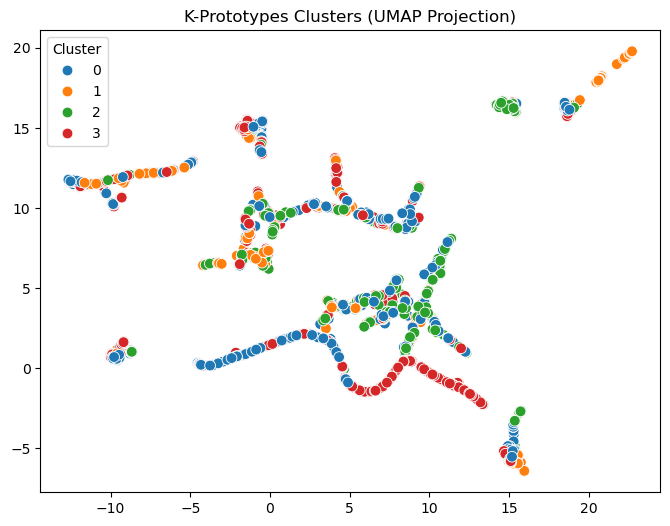

In [18]:
# ----------------------------------------
# 1️ Import Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from kmodes.kprototypes import KPrototypes
import seaborn as sns
import matplotlib.pyplot as plt
import umap


# ----------------------------------------
# 3️ Identify Feature Types
# ----------------------------------------
# Numerical: Continuous, quantitative values
num_cols = ['Age', 
            #'Height', 
            #'Weight', 
            'NCP', 'CH2O','FAF']

# Categorical: Includes binary, nominal, AND ordinal frequency-type features
cat_cols = [
    'Gender', 'family_history_with_overweight', 'FAVC',
    'FCVC', 'CAEC', 'SMOKE', 'SCC', 'TUE', 'CALC', 'MTRANS'
]

# ----------------------------------------
# 4️ Label Encode Categorical Variables
# ----------------------------------------
# LabelEncoder works since K-Prototypes expects integer-coded categories
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# ----------------------------------------
# 5️ Scale Numerical Columns
# ----------------------------------------
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# ----------------------------------------
# 6️ Prepare Data for Clustering
# ----------------------------------------
X = df[num_cols + cat_cols]

# Identify categorical column indices for K-Prototypes
cat_col_idx = [X.columns.get_loc(col) for col in cat_cols]

# ----------------------------------------
# 7️ Apply K-Prototypes Clustering
# ----------------------------------------
kproto = KPrototypes(n_clusters=4, init='Cao', random_state=42)
clusters = kproto.fit_predict(X, categorical=cat_col_idx)

# Assign clusters
df['Cluster'] = clusters

# ----------------------------------------
# 8️ Analyze Cluster Characteristics
# ----------------------------------------
print("\nCluster Summary (Numerical):")
print(df.groupby('Cluster')[num_cols].mean().round(2))

print("\nCluster Summary (Categorical):")
for col in cat_cols:
    print(f"\n{col} distribution:")
    print(df.groupby('Cluster')[col].value_counts(normalize=True)
          .unstack().fillna(0).round(2))

# ----------------------------------------
# 9️ Visualize with UMAP 
# ----------------------------------------
# UMAP helps visualize high-dimensional cluster structure
reducer = umap.UMAP(n_neighbors=15, n_components=2, random_state=42)
embedding = reducer.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=embedding[:,0], y=embedding[:,1],
                hue=df['Cluster'], palette='tab10', s=60)
plt.title("K-Prototypes Clusters (UMAP Projection)")
# --- Save the figure ---
save_path = "../images/umap_clusters_without_target.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"UMAP plot saved to: {save_path}")
plt.show()


K=2, cost=9742.96
K=3, cost=8323.11
K=4, cost=7192.72
K=5, cost=6539.39
K=6, cost=6212.60
K=7, cost=5907.69
K=8, cost=5671.50
Elbow Method plot saved to: ../images/K-Prototypes_Elbow_Method.png


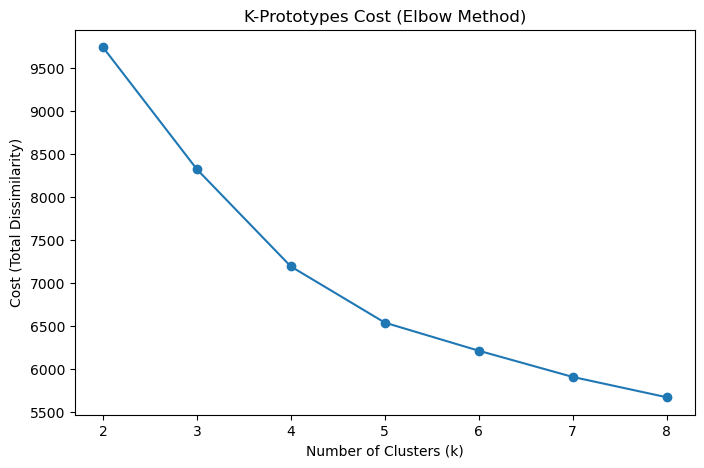

In [29]:
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

costs = []
K = range(2, 9)  # try cluster counts from 2 to 8

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42)
    kproto.fit_predict(X, categorical=cat_col_idx)
    costs.append(kproto.cost_)
    print(f'K={k}, cost={kproto.cost_:.2f}')

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, costs, marker='o')
plt.title('K-Prototypes Cost (Elbow Method)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Total Dissimilarity)')
# --- Save the figure ---
save_path = "../images/K-Prototypes_Elbow_Method.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"Elbow Method plot saved to: {save_path}")
plt.show()


In [20]:
# Summarize numerical features by cluster
num_summary = df.groupby('Cluster')[num_cols].mean().round(2)
print("Numerical Feature Averages by Cluster:")
print(num_summary)

Numerical Feature Averages by Cluster:
          Age   NCP  CH2O   FAF
Cluster                        
0       -0.49  0.53  0.42  0.90
1       -0.37 -1.91 -0.14 -0.31
2        1.70 -0.02 -0.23 -0.07
3       -0.29  0.42 -0.23 -0.75


In [21]:
print("\n Categorical Feature Distributions by Cluster:")

for col in cat_cols:
    crosstab = (
        df.groupby('Cluster')[col]
          .value_counts(normalize=True)
          .unstack()
          .fillna(0)
          .round(2)
    )
    print(f"\n{col}:\n{crosstab}")



 Categorical Feature Distributions by Cluster:

Gender:
Gender      0     1
Cluster            
0        0.39  0.61
1        0.58  0.42
2        0.36  0.64
3        0.64  0.36

family_history_with_overweight:
family_history_with_overweight     0     1
Cluster                                   
0                               0.19  0.81
1                               0.33  0.67
2                               0.07  0.93
3                               0.17  0.83

FAVC:
FAVC        0     1
Cluster            
0        0.15  0.85
1        0.14  0.86
2        0.08  0.92
3        0.09  0.91

FCVC:
FCVC      0    1    2    3    4    5    6    7    8    9    ...  800  801  \
Cluster                                                     ...             
0        0.02  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
1        0.01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
2        0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
3        0.02

In [22]:
print("\n Dominant Categories per Cluster:")
for c in df['Cluster'].unique():
    print(f"\nCluster {c}:")
    for col in cat_cols:
        mode_val = df.loc[df['Cluster']==c, col].mode()[0]
        print(f"  {col}: {mode_val}")


 Dominant Categories per Cluster:

Cluster 3:
  Gender: 0
  family_history_with_overweight: 1
  FAVC: 1
  FCVC: 809
  CAEC: 2
  SMOKE: 0
  SCC: 0
  TUE: 839
  CALC: 2
  MTRANS: 3

Cluster 0:
  Gender: 1
  family_history_with_overweight: 1
  FAVC: 1
  FCVC: 809
  CAEC: 2
  SMOKE: 0
  SCC: 0
  TUE: 0
  CALC: 2
  MTRANS: 3

Cluster 1:
  Gender: 0
  family_history_with_overweight: 1
  FAVC: 1
  FCVC: 170
  CAEC: 2
  SMOKE: 0
  SCC: 0
  TUE: 0
  CALC: 2
  MTRANS: 3

Cluster 2:
  Gender: 1
  family_history_with_overweight: 1
  FAVC: 1
  FCVC: 170
  CAEC: 2
  SMOKE: 0
  SCC: 0
  TUE: 0
  CALC: 2
  MTRANS: 0


In [23]:
overall_means = df[num_cols].mean()
diff = num_summary - overall_means

print("\n Top Differentiating Numeric Features by Cluster:")
for c in diff.index:
    top_feats = diff.loc[c].abs().sort_values(ascending=False).head(3)
    print(f"Cluster {c}: {list(top_feats.index)} (most distinct)")



 Top Differentiating Numeric Features by Cluster:
Cluster 0: ['FAF', 'NCP', 'Age'] (most distinct)
Cluster 1: ['NCP', 'Age', 'FAF'] (most distinct)
Cluster 2: ['Age', 'CH2O', 'FAF'] (most distinct)
Cluster 3: ['FAF', 'NCP', 'Age'] (most distinct)


In [24]:
def describe_cluster(c):
    row = num_summary.loc[c]
    print(f"\n Cluster {c} Summary:")
    #print(f"- Avg Age: {row['Age']:.1f}, Avg Weight: {row['Weight']:.1f} kg")
    print(f"- Avg Physical Activity (FAF): {row.get('FAF', np.nan):.1f}")
    print(f"- Avg Tech Usage (TUE): {row.get('TUE', np.nan):.1f}")
    top_feats = diff.loc[c].abs().sort_values(ascending=False).head(3)
    print(f"- Distinguishing features: {list(top_feats.index)}")


In [25]:

for c in df['Cluster'].unique():
    describe_cluster(c)


 Cluster 3 Summary:
- Avg Physical Activity (FAF): -0.8
- Avg Tech Usage (TUE): nan
- Distinguishing features: ['FAF', 'NCP', 'Age']

 Cluster 0 Summary:
- Avg Physical Activity (FAF): 0.9
- Avg Tech Usage (TUE): nan
- Distinguishing features: ['FAF', 'NCP', 'Age']

 Cluster 1 Summary:
- Avg Physical Activity (FAF): -0.3
- Avg Tech Usage (TUE): nan
- Distinguishing features: ['NCP', 'Age', 'FAF']

 Cluster 2 Summary:
- Avg Physical Activity (FAF): -0.1
- Avg Tech Usage (TUE): nan
- Distinguishing features: ['Age', 'CH2O', 'FAF']


In [26]:
import pandas as pd
import numpy as np

def generate_cluster_report(df, num_cols, cat_cols, cluster_col='Cluster'):
    clusters = sorted(df[cluster_col].unique())
    report_rows = []

    # Step 1 — Overall averages (for numeric comparison)
    overall_means = df[num_cols].mean()

    for c in clusters:
        cluster_data = df[df[cluster_col] == c]

        # --- Cluster size ---
        size = len(cluster_data)
        pct = round(100 * size / len(df), 2)

        # --- Numeric summaries ---
        num_summary = cluster_data[num_cols].mean().round(2)
        diff = (num_summary - overall_means).round(2)
        top_diff_feats = diff.abs().sort_values(ascending=False).head(3)
        top_num_features = ', '.join(top_diff_feats.index)

        # --- Dominant categories ---
        dominant_cats = {}
        for col in cat_cols:
            dominant_cats[col] = cluster_data[col].mode()[0]

        top_cat_features = ', '.join([f"{k}={v}" for k, v in list(dominant_cats.items())[:3]])

        # --- Build summary row ---
        report_rows.append({
            'Cluster': c,
            'Size': size,
            'Percent of Data (%)': pct,
            'Top Numeric Differentiators': top_num_features,
            'Dominant Categories': top_cat_features,
            'Avg Age': num_summary.get('Age', np.nan),
            'Avg Weight': num_summary.get('Weight', np.nan),
            'Avg Height': num_summary.get('Height', np.nan),
            'Avg Physical Activity (FAF)': num_summary.get('FAF', np.nan),
        })

    # Step 2 — Convert to DataFrame
    report_df = pd.DataFrame(report_rows)
    report_df = report_df.sort_values(by='Size', ascending=False).reset_index(drop=True)
    return report_df


# --- Run the report generator ---
report = generate_cluster_report(df, num_cols, cat_cols, cluster_col='Cluster')

print("Cluster Insights Report:")
print(report)


Cluster Insights Report:
   Cluster  Size  Percent of Data (%) Top Numeric Differentiators  \
0        0   704                33.35               FAF, NCP, Age   
1        3   674                31.93               FAF, NCP, Age   
2        2   395                18.71              Age, CH2O, FAF   
3        1   338                16.01               NCP, Age, FAF   

                                 Dominant Categories  Avg Age  Avg Weight  \
0  Gender=1, family_history_with_overweight=1, FA...    -0.49         NaN   
1  Gender=0, family_history_with_overweight=1, FA...    -0.29         NaN   
2  Gender=1, family_history_with_overweight=1, FA...     1.70         NaN   
3  Gender=0, family_history_with_overweight=1, FA...    -0.37         NaN   

   Avg Height  Avg Physical Activity (FAF)  
0         NaN                         0.90  
1         NaN                        -0.75  
2         NaN                        -0.07  
3         NaN                        -0.31  



 Target Distribution per Cluster:
NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Cluster                                                          
0                          0.20           0.15            0.13   
1                          0.15           0.15            0.22   
2                          0.01           0.04            0.25   
3                          0.11           0.17            0.13   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Cluster                                                             
0                      0.15              0.16                0.11   
1                      0.09              0.00                0.24   
2                      0.33              0.00                0.12   
3                      0.04              0.31                0.12   

NObeyesdad  Overweight_Level_II  
Cluster                          
0                          0.10  
1                          0.14  
2                

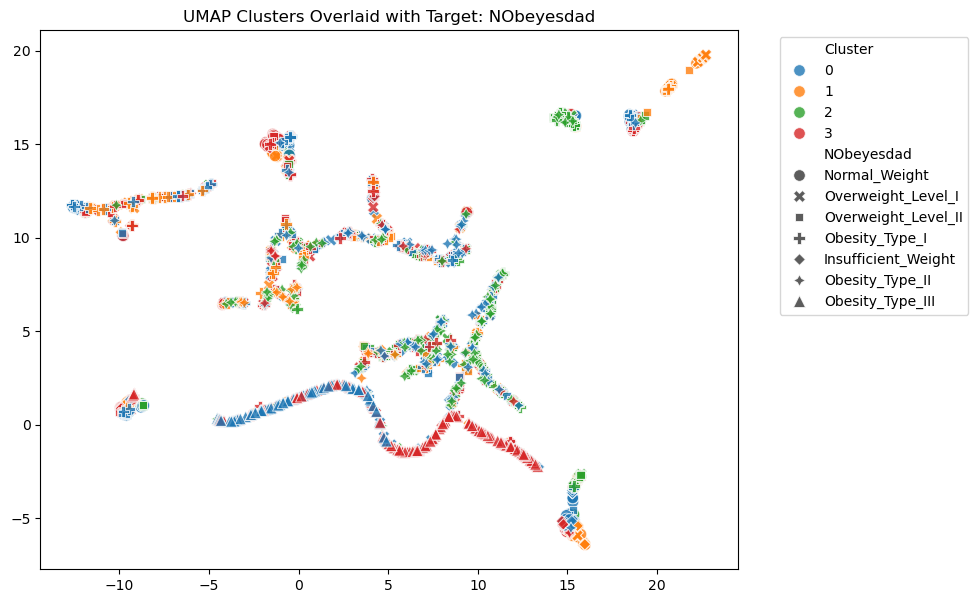

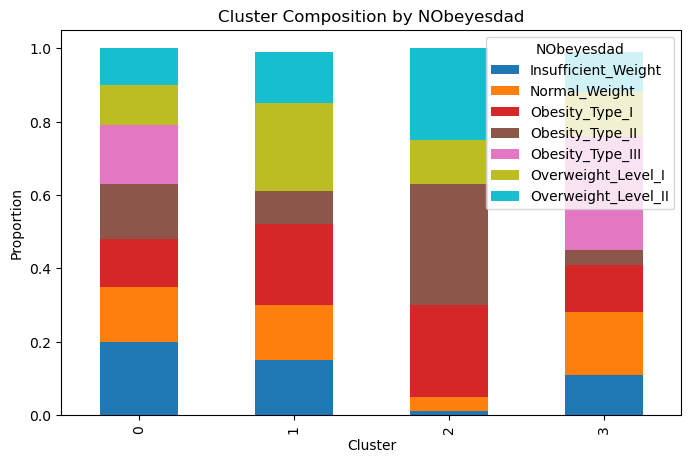

In [27]:
# ----------------------------------------
# Overlay Target Variable on Clusters
# ----------------------------------------

# target column name 
target_col = 'NObeyesdad'  

# Ensure the target column exists in df
if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found in dataframe.")

# 1️ Distribution of Target per Cluster
print("\n Target Distribution per Cluster:")
target_dist = (
    df.groupby('Cluster')[target_col]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
    .round(2)
)
print(target_dist)

# 2️ UMAP Plot — Color = Cluster, Shape = Target Class
plt.figure(figsize=(9,7))
sns.scatterplot(
    x=embedding[:,0],
    y=embedding[:,1],
    hue=df['Cluster'],
    style=df[target_col],
    palette='tab10',
    s=70,
    alpha=0.8
)
plt.title(f"UMAP Clusters Overlaid with Target: {target_col}")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# --- Save the figure ---
save_path = "../images/umap_clusters_with_target.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"UMAP plot saved to: {save_path}")
plt.show()

# 3 Bar Chart for Easier Comparison
target_dist.plot(kind='bar', stacked=True, figsize=(8,5), colormap='tab10')
plt.title(f"Cluster Composition by {target_col}")
plt.ylabel("Proportion")
plt.xlabel("Cluster")
plt.show()


In [28]:
# ----------------------------------------
#  Enhanced Cluster Summary Function (Categorical Target)
# ----------------------------------------

def describe_cluster(c, num_summary, diff, df, target_col):
    """
    Summarize cluster c:
    - Mean of numerical features (from num_summary)
    - Top distinguishing features (from diff)
    - Target variable distribution (categorical target)
    """
    print(f"\n Cluster {c} Summary:")
    
    # --- Numerical Averages ---
    row = num_summary.loc[c]
    print(f"- Avg Physical Activity (FAF): {row.get('FAF', np.nan):.2f}")
    print(f"- Avg Tech Usage (TUE): {row.get('TUE', np.nan):.2f}")
    
    # --- Distinguishing Features ---
    top_feats = diff.loc[c].abs().sort_values(ascending=False).head(3)
    print(f"- Distinguishing features: {list(top_feats.index)}")
    
    # --- Target Feature Summary ---
    target_counts = df[df['Cluster'] == c][target_col].value_counts(normalize=True)
    if not target_counts.empty:
        top_target = target_counts.index[0]
        top_target_pct = target_counts.iloc[0] * 100
        print(f"- Dominant Target Class: {top_target} ({top_target_pct:.1f}%)")
        
        print("- Full Target Distribution:")
        for label, pct in target_counts.items():
            print(f"   • {label}: {pct*100:.1f}%")
    else:
        print(f"- No target data available for Cluster {c}.")

# ----------------------------------------
# Apply to All Clusters
# ----------------------------------------

target_col = 'NObeyesdad'  

for c in sorted(df['Cluster'].unique()):
    describe_cluster(c, num_summary, diff, df, target_col)



 Cluster 0 Summary:
- Avg Physical Activity (FAF): 0.90
- Avg Tech Usage (TUE): nan
- Distinguishing features: ['FAF', 'NCP', 'Age']
- Dominant Target Class: Insufficient_Weight (20.3%)
- Full Target Distribution:
   • Insufficient_Weight: 20.3%
   • Obesity_Type_III: 16.2%
   • Normal_Weight: 14.9%
   • Obesity_Type_II: 14.8%
   • Obesity_Type_I: 13.2%
   • Overweight_Level_I: 11.1%
   • Overweight_Level_II: 9.5%

 Cluster 1 Summary:
- Avg Physical Activity (FAF): -0.31
- Avg Tech Usage (TUE): nan
- Distinguishing features: ['NCP', 'Age', 'FAF']
- Dominant Target Class: Overweight_Level_I (24.3%)
- Full Target Distribution:
   • Overweight_Level_I: 24.3%
   • Obesity_Type_I: 21.9%
   • Normal_Weight: 15.1%
   • Insufficient_Weight: 15.1%
   • Overweight_Level_II: 14.5%
   • Obesity_Type_II: 9.2%

 Cluster 2 Summary:
- Avg Physical Activity (FAF): -0.07
- Avg Tech Usage (TUE): nan
- Distinguishing features: ['Age', 'CH2O', 'FAF']
- Dominant Target Class: Obesity_Type_II (33.4%)
- Full